In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [18]:
# architecture variables
PATH = "data/dog_breeds/"

arch=resnext101
sz=299
bs=45

In [16]:
!rm -r {PATH}tmp/

labels.csv  models  subm  test	train


In [19]:
# get cross validation indexes of labels
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [20]:
# model variables
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=bs, tfms=tfms, val_idxs=val_idxs,
                                       suffix='.jpg', test_name='test')
    return data

In [21]:
# dataset
data = get_data(sz, bs)

In [22]:
# Train last layer
learn = ConvLearner.pretrained(arch, data, ps=0.5)

# ps -> dropout parameters
# hyperparameter to control overfitting (train loss < val loss) by dropping random % of nodes in a layer

In [23]:
def plot_loss_change(sched, sma=1, n_skip=20, y_lim=(-0.01,0.01)):
    """
    Plots rate of change of the loss function.
    Parameters:
        sched - learning rate scheduler, an instance of LR_Finder class.
        sma - number of batches for simple moving average to smooth out the curve.
        n_skip - number of batches to skip on the left.
        y_lim - limits for the y axis.
    """
    derivatives = [0] * (sma + 1)
    for i in range(1 + sma, len(learn.sched.lrs)):
        derivative = (learn.sched.losses[i] - learn.sched.losses[i - sma]) / sma
        derivatives.append(derivative)
        
    plt.ylabel("d/loss")
    plt.xlabel("learning rate (log scale)")
    plt.plot(learn.sched.lrs[n_skip:], derivatives[n_skip:])
    plt.xscale('log')
    plt.ylim(y_lim)

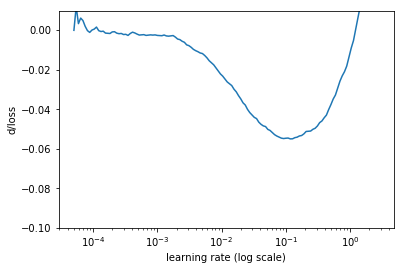

In [11]:
learn.lr_find()
learn.sched.plot()
plot_loss_change(learn.sched, sma=20, y_lim=(-0.1, 0.01))

In [9]:
lr = 1e-1

In [13]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  8%|▊         | 14/171 [00:09<01:46,  1.47it/s, loss=4.86] 


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[0.      0.71768 0.28989 0.90192]                            
[1.      0.49563 0.27004 0.90898]                            
[2.      0.46037 0.26444 0.9159 ]                            



In [14]:
learn.save('224')
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)
learn.save('224')

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      0.39494 0.25466 0.91784]                            
[1.      0.39164 0.29492 0.91175]                            
[2.      0.27536 0.25258 0.92435]                            



In [10]:
learn.load('224')

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  1%|          | 2/273 [00:02<06:40,  1.48s/it, loss=0.302] 


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 86%|████████▌ | 234/273 [04:34<00:45,  1.17s/it, loss=1.34] 


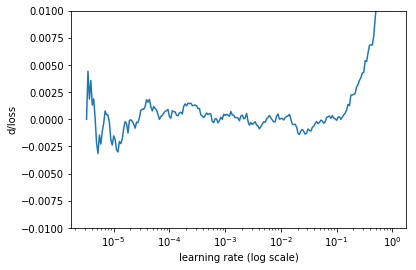

In [13]:
learn.set_data(get_data(380, 30))
learn.lr_find(start_lr=1e-6)
learn.sched.plot()
plot_loss_change(learn.sched, sma=20, y_lim=(-0.01, 0.01))

In [9]:
learn.load('380')
lr = 1e-3
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.save('380')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.26201 0.25265 0.92615]                            
[1.      0.25473 0.25237 0.92663]                            
[2.      0.25046 0.25176 0.9247 ]                            
[3.      0.23127 0.25109 0.92435]                            
[4.      0.22769 0.25197 0.9258 ]                            
[5.      0.22765 0.251   0.92483]                            
 36%|███▌      | 61/171 [00:39<01:12,  1.53it/s, loss=0.228]

KeyboardInterrupt: 

In [14]:

learn.unfreeze()
learn.bn_freeze(True)
lrs = np.array([1e-5, 1e-4, 1e-3])
learn.fit(lrs, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/171 [00:00<?, ?it/s]

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1512387374934/work/torch/lib/THC/generic/THCStorage.cu:58

In [10]:
# Test Time Augmentation

log_preds,y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)

In [11]:
df = pd.DataFrame(probs)
df.columns = learn.data.classes
df.insert(0, 'id', [o[5:-4] for o in learn.data.test_ds.fnames])

In [12]:
SUBM = f'{PATH}subm/'
filename = 'resnext101_v2'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(SUBM+filename, index=False)

In [13]:
# submit to kaggle via cli
! kg submit {SUBM+filename} -c dog-breed-identification


0.22202
